<a href="https://colab.research.google.com/github/FlashChoi5657/ESG-learning/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 5*np.random.randn(500) 
y = 2*np.random.randn(500) 
feature = np.zeros((500,2))
feature[:,0] = x
feature[:,1] = y

num_data = np.size(feature, 0)
num_feature  = np.size(feature, 1)

print(f'number of data : {num_data}')
print(f'number of feature : {num_feature}')

number of data : 500
number of feature : 2


##### plot the input data

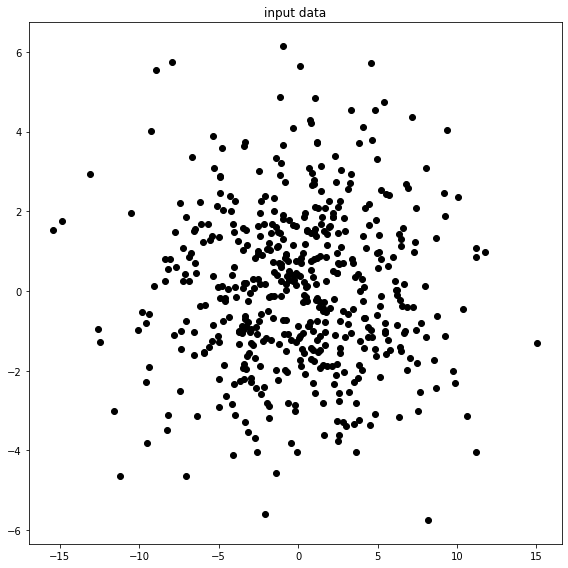

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='black')

plt.tight_layout()
plt.show()

In [10]:
cluster_k = 4
iteration = 20
loss = np.zeros(iteration)
center_iteration = np.zeros((iteration, cluster_k, num_feature))
label_pred = np.random.randint(0, cluster_k, size=(num_data))
distance = np.zeros((num_data, cluster_k))

In [ ]:
# center = np.zeros(shape=(cluster_k, num_feature))
# for num in range(cluster_k):
#     rand=np.random.randint(0,feature.shape[0]-1)
#     center[num] = feature[rand]
#     print(feature[rand])

[-2.98727809 -2.78951002]
[4.04342261 0.3494776 ]


In [ ]:
# print(center)

##### compute center

In [ ]:
center = np.zeros(shape=(cluster_k,num_feature))
cluster_1 = feature[np.where(label_pred == 0)]
center[0] = np.sum(cluster_1, axis=0) / len(cluster_1)
cluster_2 = feature[np.where(label_pred == 1)]
center[1] = np.sum(cluster_2, axis=0) / len(cluster_2)
center

array([[-0.06421354, -0.1045932 ],
       [-0.22977324, -0.16849591]])

##### compute distance

In [ ]:
loss_1 = np.sum((feature-center[0])**2, 1)
loss_2 = np.sum((feature-center[1])**2, 1)
loss_1.shape, loss_2.shape

((500,), (500,))

In [ ]:
distance = np.zeros(shape=(num_data, cluster_k))
distance[:,0] = loss_1
distance[:,1] = loss_2

##### label_assign

In [ ]:
label_pred = np.zeros(shape=(num_data))
label_pred = np.argmin(distance, axis=1)
label_pred

##### iteration

In [11]:
center = np.zeros(shape=(cluster_k, num_feature))
temp_center = np.zeros(shape=(cluster_k, num_feature))

for i in range(iteration):
  for j in range(cluster_k): # cluster_k = 2
    cluster = feature[np.where(label_pred==j)] # j=0  , j=1
    center[j] = np.sum(cluster, axis=0) / len(cluster)
    distance[:,j] = np.sum((feature - center[j]) **2, axis=1)

  label_pred = np.argmin(distance, axis=1)

  loss[i] = np.sum(distance[range(num_data),label_pred]) / num_data
  center_iteration[i] = center


In [14]:
loss

array([23.06576075,  8.33837839,  7.28699832,  7.12589129,  7.08293005,
        7.07386485,  7.07052326,  7.06808866,  7.06731173,  7.06608892,
        7.06534611,  7.06534611,  7.06534611,  7.06534611,  7.06534611,
        7.06534611,  7.06534611,  7.06534611,  7.06534611,  7.06534611])

In [ ]:
center_iteration

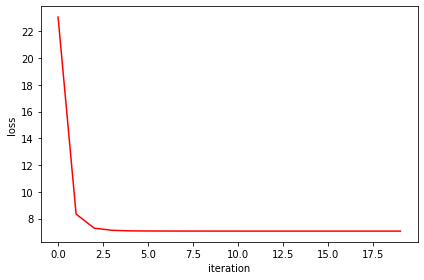

In [12]:
plt.plot(loss, '-', color='red')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.tight_layout()
plt.show()

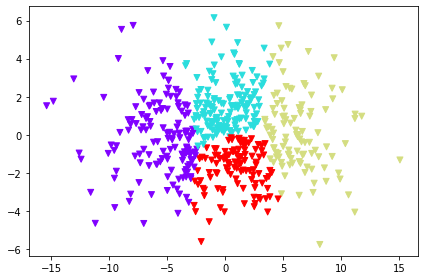

In [13]:
plt.scatter(feature[:,0], feature[:,1], marker = 'v', c = label_pred, cmap = 'rainbow')

plt.tight_layout()
plt.show()

In [ ]:
%reset

In [ ]:
center = np.zeros(shape=(cluster_k, num_feature))
distance = np.zeros(shape=(num_data, cluster_k))
temp_center = np.zeros(shape=(cluster_k, num_feature))

for i in range(iteration):
  for j in range(cluster_k):
    if len(feature[label_pred == j]) > 0: 
      center[j] = compute_centroid(feature, label_pred, j)
    else:
      center[j] = temp_center[j]

    distance[:,j] = compute_distance(feature, center[j])
  temp_center = center
  label_pred = compute_

  loss[i] = sum(distance[range(num_data),label_pred]) / num_data
  center_iteration[i] = center


##### sickit library 를 사용한 k-means clustering

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

In [17]:
kmeans.fit(feature)

KMeans(n_clusters=2)

In [18]:
label_sklearn = kmeans.predict(feature) 

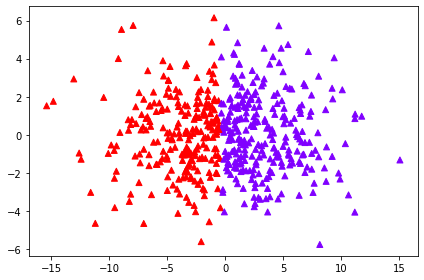

In [19]:
plt.scatter(feature[:,0], feature[:,1], marker = '^', c = label_sklearn, cmap = 'rainbow')

plt.tight_layout()
plt.show()